## Base de dados credit_card_clients

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('credit_card_clients.csv', header = 1)

In [3]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


Temos 24 colunas presentes no dataset fornecido:

    ID             - ID de cada cliente
    LIMIT_BAL      - Valor do crédito concedido em dólares do NT
    SEX            - Gênero (1 = masculino, 2 = feminino)
    EDUCATION      - 1 = pós-graduação, 2 = universidade, 3 = ensino médio, 4 = outros, 5 = desconhecido, 6 = desconhecido
    MARRIAGE       - Estado civil (1 = casado, 2 = solteiro, 3 = outros)
    AGE            - Idade em anos
    PAY_0          - Status de reembolso em setembro de 2005
    PAY_2          - Status de reembolso em agosto de 2005
    PAY_3          - Status de reembolso em julho de 2005
    PAY_4          - Status de reembolso em junho de 2005
    PAY_5          - Status de reembolso em maio de 2005
    PAY_6          - Status de reembolso em abril de 2005
    BILL_AMT1      - Valor da fatura em setembro de 2005 (dólar NT)
    BILL_AMT2      - Valor da fatura em agosto de 2005 (dólar NT)
    BILL_AMT3      - Valor da fatura em julho de 2005 (dólar NT)
    BILL_AMT4      - Valor da fatura em junho de 2005 (dólar NT)
    BILL_AMT5      - Valor da fatura em maio de 2005 (dólar NT)
    BILL_AMT6      - Valor da fatura em abril de 2005 (dólar NT)
    PAY_AMT1       - Valor do pagamento anterior em setembro de 2005 (dólar NT)
    PAY_AMT2       - Valor do pagamento anterior em agosto de 2005 (dólar NT)
    PAY_AMT3       - Valor do pagamento anterior em julho de 2005 (dólar NT)
    PAY_AMT4       - Valor do pagamento anterior em junho de 2005 (dólar NT)
    PAY_AMT5       - Valor do pagamento anterior em maio de 2005 (dólar NT)
    PAY_AMT6       - Valor do pagamento anterior em abril de 2005 (dólar NT)
    d.p.next.month - Pagamento padrão (1 = sim, 0 = não)

In [4]:
# Criaremos uma coluna com o valor total das faturas:
df['BILL_TOTAL'] = df['BILL_AMT1'] + df['BILL_AMT2'] + df['BILL_AMT3'] + df['BILL_AMT4'] + df['BILL_AMT5'] + df['BILL_AMT6']

In [5]:
X = df.iloc[:, [1, 25]].values

###### Escalonamento dos dados

In [6]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [7]:
X = sc.fit_transform(X)

C:\Users\Lucas\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Lucas\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


##### Escolha ideal de Clusters

In [8]:
from sklearn.cluster import KMeans

In [9]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

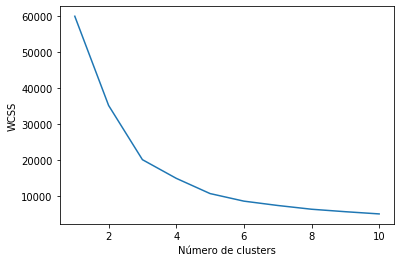

In [10]:
plt.plot(range(1, 11), wcss)
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')

Com este gráfico podemos observar que o valor **3** ou o valor de **4** clusters são os mais ideais.

###### Agrupamento utilizando o algortimo KMeans
O agrupamento k-means é um método de Clustering que objetiva particionar n observações dentre k grupos onde cada observação pertence ao grupo mais próximo da média.

In [11]:
kmeans = KMeans(n_clusters=4, random_state=0)
previsoes = kmeans.fit_predict(X)

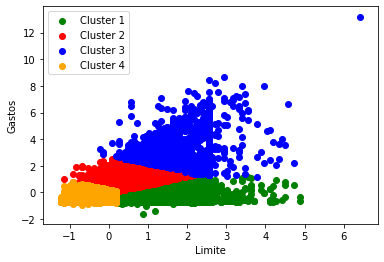

In [12]:
plt.scatter(X[previsoes == 0, 0], X[previsoes == 0, 1], c = 'green', label = 'Cluster 1')
plt.scatter(X[previsoes == 1, 0], X[previsoes == 1, 1], c = 'red', label = 'Cluster 2')
plt.scatter(X[previsoes == 2, 0], X[previsoes == 2, 1], c = 'blue', label = 'Cluster 3')
plt.scatter(X[previsoes == 3, 0], X[previsoes == 3, 1], c = 'orange', label = 'Cluster 4')
plt.xlabel('Limite')
plt.ylabel('Gastos')
plt.legend()

Aqui podemos observar que:

- O grupo 'Cluster 1' (verde) eles tem limites maior de crédito e um gasto baixo
- O grupo 'Cluster 2' (vermelho) eles tem limites entre médio/alto e eles gastam entre o limite do cartão de crédito
- O grupo 'Cluster 3' (azul) eles tem limites entre médio/alto com maior tendência em alto, e possuem um gasto alto
- O grupo 'Cluster 4' (laranja) eles tem limites de crédito baixo e um gasto baixo

Neste caso, dependeria da regra de négocio da empresa, vamos supor que queiramos aumentar o limite do cartão das pessoas, oque valeria a pena seria aumentar o limite do 'Cluster 3'.

###### Agrupamento utlizando o algoritmo DBSCAN 
O algoritmo DBSCAN é utilizado para encontrar associações e estruturas em dados que são difíceis de serem encontrados manualmente, sendo assim, ele é muito utilizado para encontrar padrões e prever tendências.

In [13]:
# Importações
from sklearn.cluster import DBSCAN

In [14]:
# Obs: bastante díficil encontrar os paramêtros do DBSCAN
dbscan = DBSCAN(eps = 0.37, min_samples = 4)
previsoes = dbscan.fit_predict(X)
unicos, quantidade = np.unique(previsoes, return_counts = True)

In [15]:
unicos

array([-1,  0,  1,  2], dtype=int64)

In [16]:
quantidade

array([   42, 29931,    18,     9], dtype=int64)

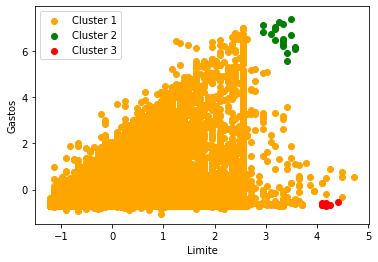

In [17]:
plt.scatter(X[previsoes == 0, 0], X[previsoes == 0, 1], c = 'orange', label = 'Cluster 1')
plt.scatter(X[previsoes == 1, 0], X[previsoes == 1, 1], c = 'green', label = 'Cluster 2')
plt.scatter(X[previsoes == 2, 0], X[previsoes == 2, 1], c = 'red', label = 'Cluster 3')
plt.xlabel('Limite')
plt.ylabel('Gastos')
plt.legend()

Podemos observar no gráfico que o agrupamento não funcionou muito bem, pois ele encontrou poucos registros para os outros grupos. Porém, podemos usar os registros do grupo 'Cluster 2' que possuem alto limite do cartão de crédito e que tem mais chances de gastar, e podemos aumentar o limite do cartão de crédito destes clientes.